In [3]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib as mpl

In [1]:
def compress_latents(latents_paths):

    tsne = TSNE(n_components=2)

    all_latents = []
    for latent_pth in latents_paths:
        latents = np.load(latent_pth)['z']
        all_latents.append(latents)

    all_latents_np = np.concatenate(all_latents)
    all_latents_np_ld = tsne.fit_transform(all_latents_np)

    all_latents_ld = []
    start_pointer = 0
    for latent in all_latents:
        latents_ld = all_latents_np_ld[start_pointer:start_pointer+latent.shape[0]]
        assert latents_ld.shape[0]==latent.shape[0]
        all_latents_ld.append(latents_ld)
        start_pointer+=latent.shape[0]

    return all_latents_ld


# NTU and InfAct

In [ ]:
latents_pths = ['./results/ntu_5_split_evaluated_woft/best_model_z_values.npz',
'./results_in/InfAct_InfAct_converted_nosplit_ext/best_model_z_values.npz',]
'./results_InfAct_cf/InfAct_postures_cf0/'
ntu_5_latents_ld, infact_latents_ld = compress_latents(latents_pths)

ntu_5_gts = np.argmax(np.load('./data/ntu_5_split/NTU120_CSub_jlim.npz')['y_test'], axis=-1)
infact_gts = np.argmax(np.load('./data/InfAct_temp/InfAct_converted_nosplit_ext.npz')['y_train'], axis=-1)

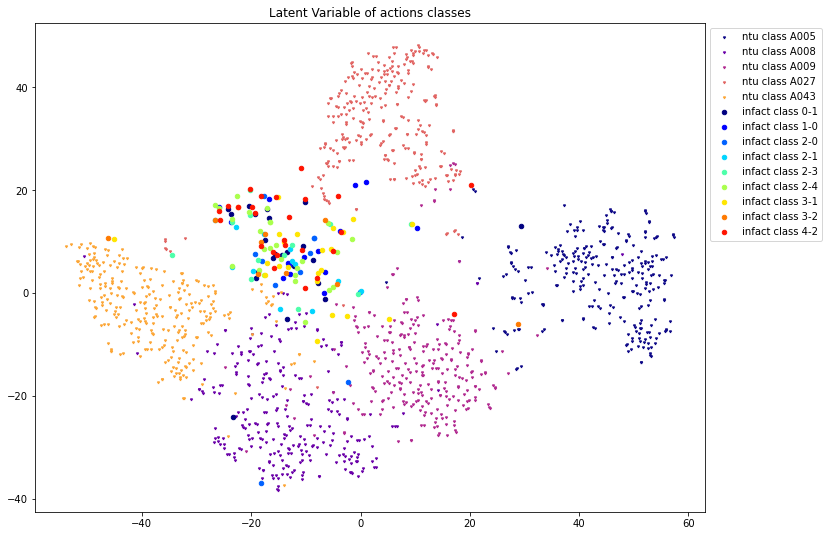

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
fig.set_facecolor('white')
ax.set_title('Latent Variable of actions classes')

class_names = ['A005','A008','A009', 'A027', 'A043']
cmap = mpl.colormaps.get_cmap('plasma')
for l in np.unique(ntu_5_gts):
    ax.scatter(ntu_5_latents_ld[ntu_5_gts==l,0], ntu_5_latents_ld[ntu_5_gts==l,1], s=10, marker='1',
               label=f'ntu class {class_names[l]}', color=cmap(l/len(np.unique(ntu_5_gts))))
    
class_names = ['0-1', '1-0', '2-0', '2-1', '2-3', '2-4', '3-1', '3-2', '4-2', '4-3']
cmap = mpl.colormaps.get_cmap('jet')
for l in np.unique(infact_gts):
    ax.scatter(infact_latents_ld[infact_gts==l,0], infact_latents_ld[infact_gts==l,1], s=20, marker='o',
               label=f'infact class {class_names[l]}', color=cmap(l/len(np.unique(infact_gts))))
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# Augmented data and NTU

In [5]:
latents_pths = ['./results/ntu_5_split_evaluated_woft/best_model_z_values.npz',
'./results/AugData_augdata/z_values_test.npz']

ntu_5_latents_ld, augdata_latents_ld = compress_latents(latents_pths)


ntu_5_gts = np.argmax(np.load('./data/ntu_5_split/NTU120_CSub_jlim.npz')['y_test'], axis=-1)
augdata_gts = np.load('./results/AugData_augdata/z_values_test.npz')['labels']

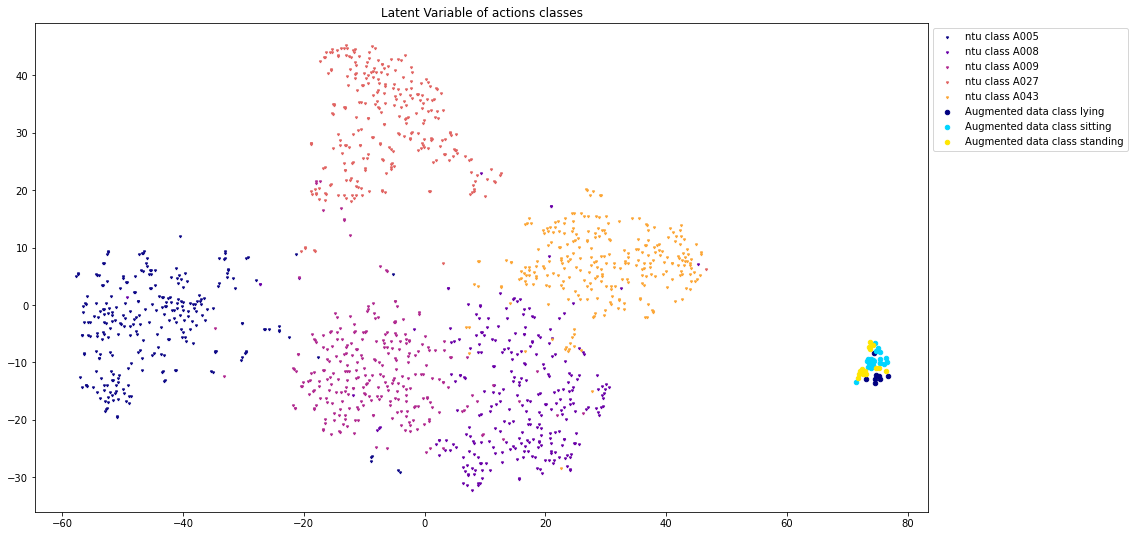

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
fig.set_facecolor('white')
ax.set_title('Latent Variable of actions classes')
    
class_names = ['A005','A008','A009', 'A027', 'A043']
cmap = mpl.colormaps.get_cmap('plasma')
for l in np.unique(ntu_5_gts):
    ax.scatter(ntu_5_latents_ld[ntu_5_gts==l,0], ntu_5_latents_ld[ntu_5_gts==l,1], s=10, marker='1',
               label=f'ntu class {class_names[l]}', color=cmap(l/len(np.unique(ntu_5_gts))))
    
class_names = ['lying', 'sitting', 'standing']
cmap = mpl.colormaps.get_cmap('jet')
for l in np.unique(augdata_gts):
    ax.scatter(augdata_latents_ld[augdata_gts==l,0], augdata_latents_ld[augdata_gts==l,1], s=20, 
               label=f'Augmented data class {class_names[l]}', marker='o', color=cmap(l/len(np.unique(augdata_gts))))
    

ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# Augmented data, InfAct and NTU5

In [44]:
latents_pths = ['./results/ntu_5_split_evaluated_woft/best_model_z_values.npz',
'./results/InfAct_InfAct_converted_nosplit_ext/best_model_z_values.npz',
'./results/AugData_augdata/z_values_test.npz']

ntu_5_latents_ld, infact_latents_ld, augdata_latents_ld = compress_latents(latents_pths)


ntu_5_gts = np.argmax(np.load('./data/ntu_5_split/NTU120_CSub_jlim.npz')['y_test'], axis=-1)
infact_gts = np.argmax(np.load('./data/InfAct_temp/InfAct_converted_nosplit_ext.npz')['y_train'], axis=-1)
augdata_gts = np.load('./results/AugData_augdata/z_values_test.npz')['labels']

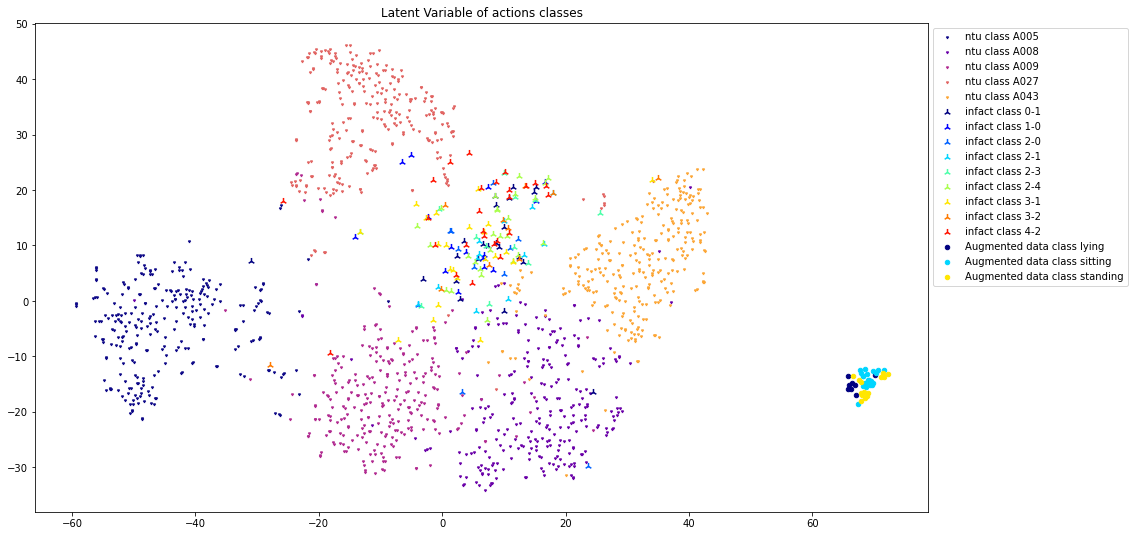

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
fig.set_facecolor('white')
ax.set_title('Latent Variable of actions classes')
    
class_names = ['A005','A008','A009', 'A027', 'A043']
cmap = mpl.colormaps.get_cmap('plasma')
for l in np.unique(ntu_5_gts):
    ax.scatter(ntu_5_latents_ld[ntu_5_gts==l,0], ntu_5_latents_ld[ntu_5_gts==l,1], s=10, marker='1',
               label=f'ntu class {class_names[l]}', color=cmap(l/len(np.unique(ntu_5_gts))))
    
class_names = ['0-1', '1-0', '2-0', '2-1', '2-3', '2-4', '3-1', '3-2', '4-2', '4-3']
cmap = mpl.colormaps.get_cmap('jet')
for l in np.unique(infact_gts):
    ax.scatter(infact_latents_ld[infact_gts==l,0], infact_latents_ld[infact_gts==l,1], s=50, marker='2',
               label=f'infact class {class_names[l]}', color=cmap(l/len(np.unique(infact_gts))))
    
class_names = ['lying', 'sitting', 'standing']
cmap = mpl.colormaps.get_cmap('jet')
for l in np.unique(augdata_gts):
    ax.scatter(augdata_latents_ld[augdata_gts==l,0], augdata_latents_ld[augdata_gts==l,1], s=20, 
               label=f'Augmented data class {class_names[l]}', marker='o', color=cmap(l/len(np.unique(augdata_gts))))
    

ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# Augmented data

In [37]:
latents_pths = ['./results/ntu_5_split_evaluated_woft/best_model_z_values.npz',
'./results/AugData_augdata/z_values_test.npz']

ntu_5_latents_ld, augdata_latents_ld = compress_latents(latents_pths)


ntu_5_gts = np.argmax(np.load('./data/ntu_5_split/NTU120_CSub_jlim.npz')['y_test'], axis=-1)
augdata_gts = np.load('./results/AugData_augdata/z_values_test.npz')['labels']

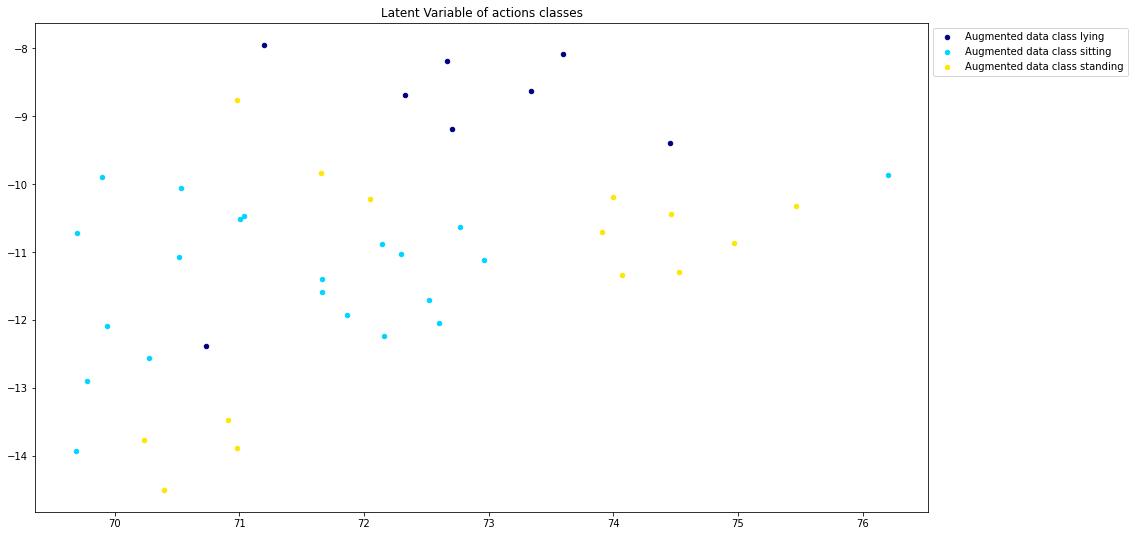

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(16,9)
fig.set_facecolor('white')
ax.set_title('Latent Variable of actions classes')
    
class_names = ['lying', 'sitting', 'standing']
cmap = mpl.colormaps.get_cmap('jet')
for l in np.unique(augdata_gts):
    ax.scatter(augdata_latents_ld[augdata_gts==l,0], augdata_latents_ld[augdata_gts==l,1], s=20, 
               label=f'Augmented data class {class_names[l]}', marker='o', color=cmap(l/len(np.unique(augdata_gts))))
    

ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# NTU and InfAct

In [70]:
latents_pths = ['./results/ntu_5_split_evaluated_woft/best_model_z_values.npz',
'./results/InfAct_InfAct_converted_nosplit_ext/best_model_z_values.npz',]
ntu_5_latents_ld, infact_latents_ld = compress_latents(latents_pths)

ntu_5_gts = np.argmax(np.load('./data/ntu_5_split/NTU120_CSub_jlim.npz')['y_test'], axis=-1)
infact_gts = np.argmax(np.load('./data/InfAct_temp/InfAct_converted_nosplit_ext.npz')['y_train'], axis=-1)

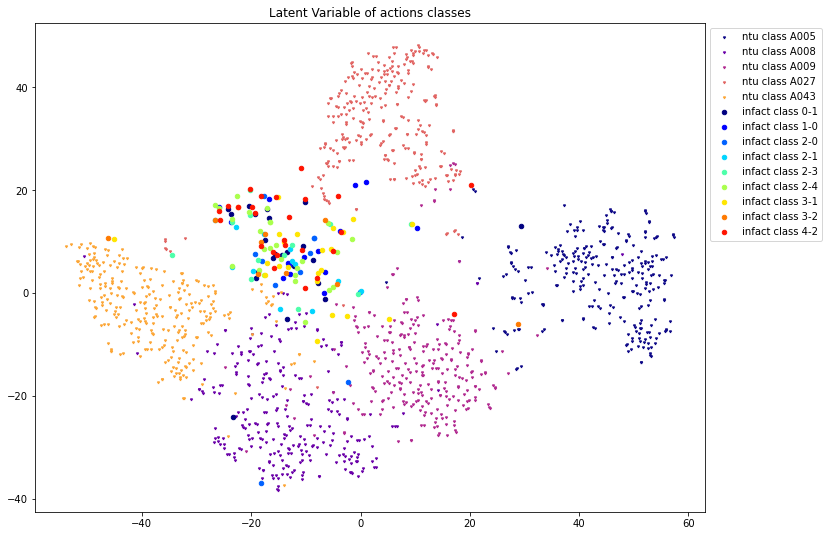

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
fig.set_facecolor('white')
ax.set_title('Latent Variable of actions classes')

class_names = ['A005','A008','A009', 'A027', 'A043']
cmap = mpl.colormaps.get_cmap('plasma')
for l in np.unique(ntu_5_gts):
    ax.scatter(ntu_5_latents_ld[ntu_5_gts==l,0], ntu_5_latents_ld[ntu_5_gts==l,1], s=10, marker='1',
               label=f'ntu class {class_names[l]}', color=cmap(l/len(np.unique(ntu_5_gts))))
    
class_names = ['0-1', '1-0', '2-0', '2-1', '2-3', '2-4', '3-1', '3-2', '4-2', '4-3']
cmap = mpl.colormaps.get_cmap('jet')
for l in np.unique(infact_gts):
    ax.scatter(infact_latents_ld[infact_gts==l,0], infact_latents_ld[infact_gts==l,1], s=20, marker='o',
               label=f'infact class {class_names[l]}', color=cmap(l/len(np.unique(infact_gts))))
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# NTU and UCLA

In [39]:
latents_pths = ['./results/ntu_5_split_evaluated_woft/best_model_z_values.npz',
'./results/UCLA_eval_ntuweights/best_model_z_values.npz']
ntu_5_latents_ld, ucla_latents_ntu_ld = compress_latents(latents_pths)

ntu_5_gts = np.argmax(np.load('./data/ntu_5_split/NTU120_CSub_jlim.npz')['y_test'], axis=-1)
with open('./data/NW-UCLA/val_label.pkl', 'rb') as f:
    ucla_gts = pickle.load(f)
ucla_gts = np.array([f['label'] for f in ucla_gts])-1

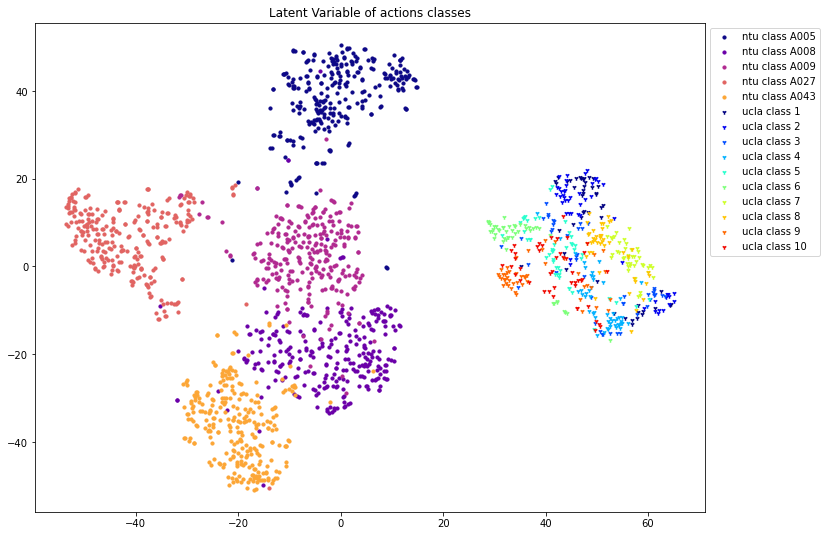

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
fig.set_facecolor('white')
ax.set_title('Latent Variable of actions classes')

class_names = ['A005','A008','A009', 'A027', 'A043']
cmap = mpl.colormaps.get_cmap('plasma')
for l in np.unique(ntu_5_gts):
    ax.scatter(ntu_5_latents_ld[ntu_5_gts==l,0], ntu_5_latents_ld[ntu_5_gts==l,1], s=10, marker='o',
               label=f'ntu class {class_names[l]}', color=cmap(l/len(np.unique(ntu_5_gts))))
    
class_names = range(10)
cmap = mpl.colormaps.get_cmap('jet')
for l in np.unique(ucla_gts):
    ax.scatter(ucla_latents_ntu_ld[ucla_gts==l,0], ucla_latents_ntu_ld[ucla_gts==l,1], s=20, 
               label=f'ucla class {class_names[l]+1}', marker='1', color=cmap(l/len(np.unique(ucla_gts))))
ax.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()